In [248]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing data
data = pd.read_csv("/content/drive/MyDrive/CSE422 Labs/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Dataset Visualization**
---



In [ ]:
#data visualization
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#finding out rows and columns
data.shape

(768, 9)

In [ ]:
#Column names
list(data.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
#showing first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#showing randomly 5 rows
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
47,2,71,70,27,0,28.0,0.586,22,0
571,2,130,96,0,0,22.6,0.268,21,0
423,2,115,64,22,0,30.8,0.421,21,0
661,1,199,76,43,0,42.9,1.394,22,1
302,5,77,82,41,42,35.8,0.156,35,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


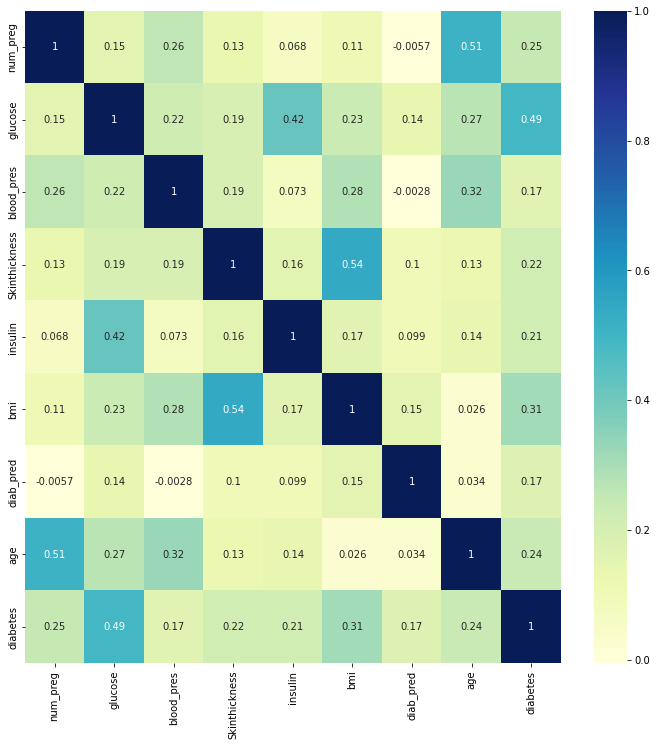

In [211]:
## Correlations of each features in the dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

#plotting the heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

# **Pre-processing**

---



In [ ]:
#checking null Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# changing some columns' names :
data.columns=['num_preg','glucose', 'blood_pres','Skinthickness','insulin','bmi','diab_pred','age','diabetes']
data.head(3)

,num_preg,glucose,blood_pres,Skinthickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# Checking if the database is balanced or not by counting the the 0's and 1's the diabetes column
diab_True = len(data.loc[data['diabetes'] == 1])
diab_False = len(data.loc[data['diabetes'] == 0])
print('1s :', diab_True,'  0s :',diab_False)

1s : 268   0s : 500


In [ ]:
# checking how many zeros are there in each column
for column in data.columns[:-1]:
    print(column, " -> ",len(data.loc[data[column] == 0]))

num_preg  ->  111
glucose  ->  5
blood_pres  ->  35
Skinthickness  ->  227
insulin  ->  374
bmi  ->  11
diab_pred  ->  0
age  ->  0


*Imputing missing values*

In [ ]:
#now we have to fill the values with zero with mean value of the column
imputer = SimpleImputer(missing_values=0, strategy='mean') #creating a object named imputer


imputer.fit(data[['num_preg']])
data['num_preg'] = imputer.transform(data[['num_preg']])


imputer.fit(data[['glucose']])
data['glucose'] = imputer.transform(data[['glucose']])

imputer.fit(data[['blood_pres']])
data['blood_pres'] = imputer.transform(data[['blood_pres']])

imputer.fit(data[['Skinthickness']])
data['Skinthickness'] = imputer.transform(data[['Skinthickness']])

imputer.fit(data[['insulin']])
data['insulin'] = imputer.transform(data[['insulin']])

imputer.fit(data[['bmi']])
data['bmi'] = imputer.transform(data[['bmi']])

In [ ]:
# checking how many zeros are there in each column
for column in data.columns[:-1]:
    print(column, " -> ",len(data.loc[data[column] == 0]))

num_preg  ->  0
glucose  ->  0
blood_pres  ->  0
Skinthickness  ->  0
insulin  ->  0
bmi  ->  0
diab_pred  ->  0
age  ->  0


In [ ]:
feature = data[['num_preg','glucose','blood_pres','Skinthickness','insulin','bmi','diab_pred','age']]
label = data[['diabetes']]

In [ ]:
feature

,num_preg,glucose,blood_pres,Skinthickness,insulin,bmi,diab_pred,age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [ ]:
label

,diabetes
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [228]:
#Stratified 


# stratY = pd.DataFrame(label) #creating a object of DataFrame so that we can stratify it

# #stratifying will give use corresponding Y_Test values in actual portion of the dataset
# # In actual dataset: The ratio of 0's and 1's in Label column, will be also be the same in 
# # test and train sets

# XX=data.loc[:, :'age'].values
# YY=data.loc[:, 'diabetes'].values
# X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.25, stratify=stratY,random_state=0)

In [229]:
#Randomly

stratY = pd.DataFrame(label) #creating a object of DataFrame so that we can stratify it

#stratifying will give use corresponding Y_Test values in actual portion of the dataset
# In actual dataset: The ratio of 0's and 1's in Label column, will be also be the same in 
# test and train sets

XX=data.loc[:, :'age'].values
YY=data.loc[:, 'diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.25, random_state=0)

In [153]:
data.shape

(768, 9)

In [172]:
#checking if stratify worked

unique, counts = np.unique(y_test, return_counts=True)
aTemp = np.asarray((unique, counts)).T
print(aTemp[0][0],"->",aTemp[0][1])
print(aTemp[1][0],"->",aTemp[1][1])

print("Ratio: ", aTemp[0][1]/aTemp[1][1]) #125/67


0 -> 125
1 -> 67
Ratio:  1.8656716417910448


In [171]:
#checking if stratify worked
unique, counts = np.unique(y_train, return_counts=True)
aTemp = np.asarray((unique, counts)).T
print(aTemp[0][0],"->",aTemp[0][1])
print(aTemp[1][0],"->",aTemp[1][1])

print("Ratio: ", aTemp[0][1]/aTemp[1][1]) #125/67


0 -> 375
1 -> 201
Ratio:  1.8656716417910448


In [154]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (576, 8)
y_train:  (576,)
X_test:  (192, 8)
y_test:  (192,)


# **Algorithms**

---



In [249]:
# Model: 1
#Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

print("Accuracy for Decision Tree Classifier = {:.3f}".format(dtc.score(X_test, y_test)))
print("Error for Decision Tree Classifier = {:.3f}".format(1-dtc.score(X_test, y_test)))

Accuracy for Decision Tree Classifier = 0.760
Error for Decision Tree Classifier = 0.240


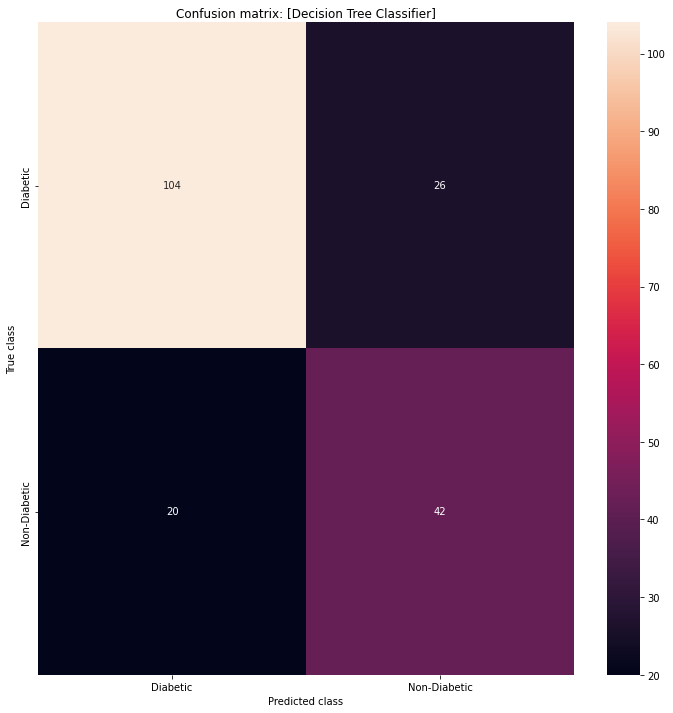

In [251]:
# printing the confusion matrix
LABELS = ['Diabetic', 'Non-Diabetic']

conf_matrix = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize =(12, 12))

sns.heatmap(conf_matrix, xticklabels = LABELS,
            
			yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix: [Decision Tree Classifier]")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [246]:
# Model: 2
#K Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) #training
y_pred_knn = knn.predict(X_test)

print("Accuracy for KNeighbors Classifier = {:.3f}".format(knn.score(X_test, y_test)))
print("Error for KNeighbors Classifier = {:.3f}".format(1-knn.score(X_test, y_test)))

Accuracy for KNeighbors Classifier = 0.661
Error for KNeighbors Classifier = 0.339


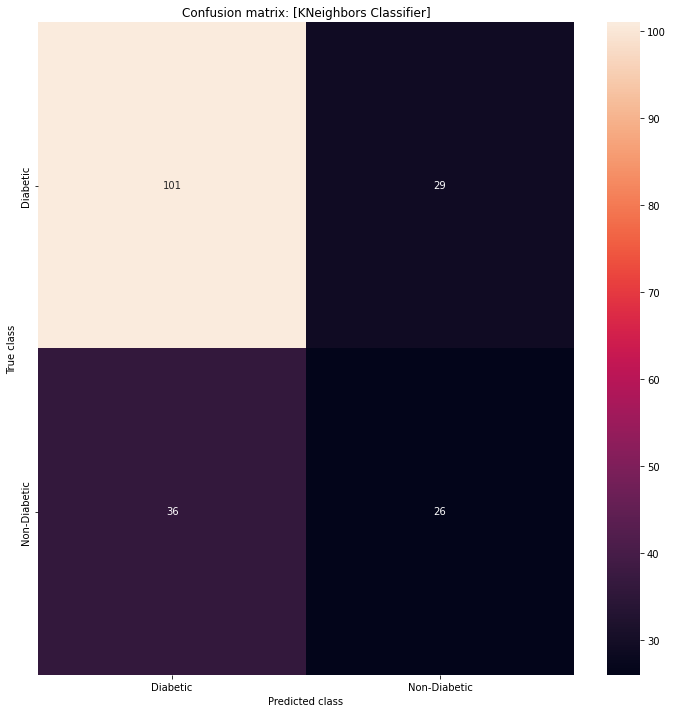

In [250]:
# printing the confusion matrix
LABELS = ['Diabetic', 'Non-Diabetic']

conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize =(12, 12))

sns.heatmap(conf_matrix, xticklabels = LABELS,
            
			yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix: [KNeighbors Classifier]")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [252]:
# Model: 3
#Logistic Regression
lrm = LogisticRegression(random_state=0)
lrm.fit(X_train, y_train)

y_pred_lrm = lrm.predict(X_test)
print("Accuracy for Logistic Regression = {0:.3f}".format(lrm.score(X_test, y_test)))
print("Error for Logistic Regression = {0:.3f}".format(1-lrm.score(X_test, y_test)))

Accuracy for Logistic Regression = 0.792
Error for Logistic Regression = 0.208


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


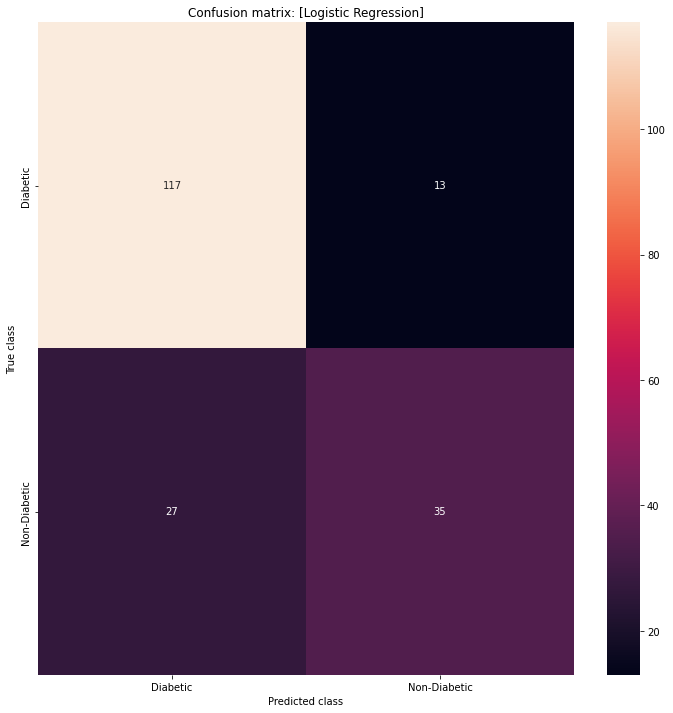

In [237]:
# printing the confusion matrix
LABELS = ['Diabetic', 'Non-Diabetic']

conf_matrix = confusion_matrix(y_test, y_pred_lrm)

plt.figure(figsize =(12, 12))

sns.heatmap(conf_matrix, xticklabels = LABELS,
            
			yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix: [Logistic Regression]")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()